Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


**Importing the Dog vs Cat Dataset from Kaggle**

In [ ]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:12<00:00, 49.8MB/s]
100% 812M/812M [00:12<00:00, 68.1MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data  sampleSubmission.csv


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.4554.jpg', 'dog.10336.jpg', 'dog.6151.jpg', 'dog.5083.jpg', 'cat.4657.jpg', 'dog.6698.jpg', 'cat.5727.jpg', 'cat.6846.jpg', 'dog.486.jpg', 'dog.10724.jpg', 'cat.7566.jpg', 'cat.10200.jpg', 'dog.4066.jpg', 'dog.9343.jpg', 'cat.3997.jpg', 'dog.9354.jpg', 'dog.4416.jpg', 'cat.11766.jpg', 'cat.1670.jpg', 'dog.3935.jpg', 'dog.7026.jpg', 'cat.1507.jpg', 'dog.8613.jpg', 'cat.10814.jpg', 'dog.5392.jpg', 'cat.1582.jpg', 'dog.6179.jpg', 'dog.5085.jpg', 'dog.10973.jpg', 'cat.4108.jpg', 'dog.1150.jpg', 'cat.7092.jpg', 'dog.1083.jpg', 'dog.8447.jpg', 'cat.9303.jpg', 'dog.9520.jpg', 'dog.10554.jpg', 'cat.6272.jpg', 'cat.8338.jpg', 'dog.11604.jpg', 'dog.11813.jpg', 'dog.1047.jpg', 'cat.5457.jpg', 'dog.1924.jpg', 'dog.4666.jpg', 'dog.389.jpg', 'cat.3319.jpg', 'cat.69.jpg', 'cat.5835.jpg', 'dog.234.jpg', 'dog.6137.jpg', 'dog.10999.jpg', 'cat.5323.jpg', 'dog.8379.jpg', 'cat.701.jpg', 'dog.5599.jpg', 'dog.6614.jpg', 'dog.540.jpg', 'dog.2936.jpg', 'dog.625.jpg', 'dog.8862.jpg', 'cat.86.jpg', 'cat.29

**Importing the Dependencies**

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

**Displaying the images of dogs and cats**

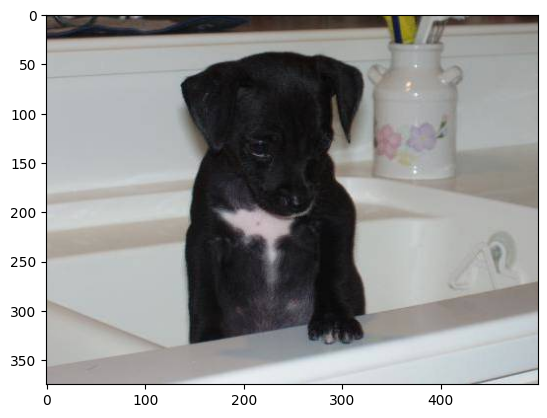

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

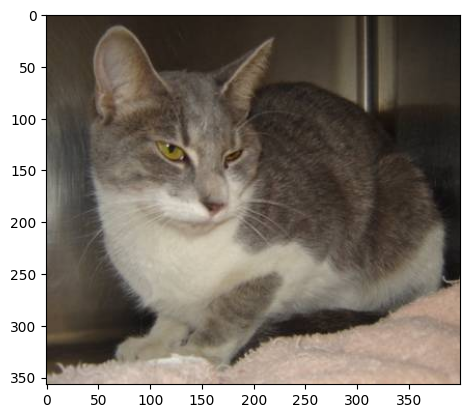

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
dog
dog
dog
cat


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


**Resizing all the images**

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.4554.jpg', 'dog.10336.jpg', 'dog.6151.jpg', 'dog.5083.jpg', 'cat.4657.jpg']
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 979 1021]


**Converting all the resized images to numpy arrays**

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  ...

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]]


 [[[ 42 179 171]
   [ 47 184 176]
   [ 55 192 184]
   ...
   [110 209 213]
   [107 206 210]
   [124 223 227]]

  [[ 51 188 180]
   [ 55 192 184]
   [ 61 198 190]
   ...
   [117 216 220]
   [108 207 211]
   [116 215 219]]

  [[ 59 196 188]
   [ 62 199 191]
   [ 65 202 194]
   ...
   [114 214 219]
   [103 203 208]
   [102 202

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


**1600 --> training images**

**400 --> test images bold text bold text**

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.49411765 0.44705882 0.47058824]
   [0.56862745 0.52156863 0.54509804]
   [0.52156863 0.48235294 0.50588235]
   ...
   [0.38823529 0.33333333 0.34901961]
   [0.48627451 0.43921569 0.4627451 ]
   [0.5254902  0.47843137 0.50196078]]

  [[0.50588235 0.45882353 0.48235294]
   [0.55686275 0.50980392 0.53333333]
   [0.51764706 0.47843137 0.50196078]
   ...
   [0.37647059 0.32156863 0.3372549 ]
   [0.46666667 0.41960784 0.44313725]
   [0.49411765 0.44705882 0.47058824]]

  [[0.51372549 0.46666667 0.49019608]
   [0.52941176 0.48235294 0.50588235]
   [0.49803922 0.45882353 0.48235294]
   ...
   [0.39607843 0.34117647 0.35686275]
   [0.47843137 0.43137255 0.45490196]
   [0.49019608 0.44313725 0.46666667]]

  ...

  [[0.41568627 0.39215686 0.41176471]
   [0.40392157 0.38039216 0.4       ]
   [0.40392157 0.38039216 0.4       ]
   ...
   [0.25882353 0.2745098  0.34901961]
   [0.25490196 0.27843137 0.35294118]
   [0.30980392 0.33333333 0.40784314]]

  [[0.41960784 0.39607843 0.41568627]
   [0.4

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 79s 1s/step - loss: 0.2426 - acc: 0.8994
Epoch 2/5
50/50 [==============================] - 81s 2s/step - loss: 0.0904 - acc: 0.9663
Epoch 3/5
50/50 [==============================] - 68s 1s/step - loss: 0.0703 - acc: 0.9762
Epoch 4/5
50/50 [==============================] - 68s 1s/step - loss: 0.0589 - acc: 0.9831
Epoch 5/5
50/50 [==============================] - 70s 1s/step - loss: 0.0494 - acc: 0.9875


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 21s 1s/step - loss: 0.0531 - acc: 0.9850
Test Loss = 0.05306787043809891
Test Accuracy = 0.9850000143051147


Predictive System

Path of the image to be predicted: /content/dog.jpg


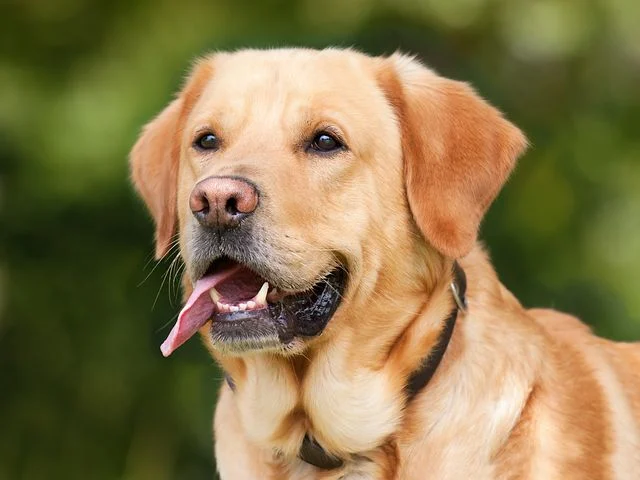

[[-4.6012597  3.784018 ]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


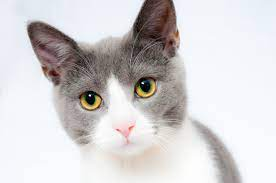

[[ 4.302739 -4.893738]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')